In [13]:
#[Load and Process the Dataset: NHANES-10000]
import numpy as np
import gzip
with open('NHANES.csv','r') as f:
    #gp from raw data into filtered and clean data--------------------------------------------------
    raw = [row.replace('\n','').replace('\r','').split(',') for row in f.readlines()]
    header,data,D = raw[0],raw[1:],[]
print(header)
print(len(data))

['SurveyYr', 'ID', 'Gender', 'Age', 'AgeDecade', 'AgeMonths', 'Race1', 'Race3', 'Education', 'MaritalStatus', 'HHIncome', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'HomeOwn', 'Work', 'Weight', 'Length', 'HeadCirc', 'Height', 'BMI', 'BMICatUnder20yrs', 'BMI_WHO', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'Diabetes', 'DiabetesAge', 'HealthGen', 'DaysPhysHlthBad', 'DaysMentHlthBad', 'LittleInterest', 'Depressed', 'nPregnancies', 'nBabies', 'Age1stBaby', 'SleepHrsNight', 'SleepTrouble', 'PhysActive', 'PhysActiveDays', 'TVHrsDay', 'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild', 'Alcohol12PlusYr', 'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100', 'Smoke100n', 'SmokeAge', 'Marijuana', 'AgeFirstMarij', 'RegularMarij', 'AgeRegMarij', 'HardDrugs', 'SexEver', 'SexAge', 'SexNumPartnLife', 'SexNumPartYear', 'SameSex', 'SexOrientation']
10000


In [14]:
import numpy as np
def float_and_nan(x):
    if x=='NA': return np.nan
    else:       return float(x)

SUMMARY STATISTICS
               Age       Weight       Height          BMI
count  9630.000000  9630.000000  9630.000000  9630.000000
mean     37.735514    72.738775   161.880384    26.644585
std      21.797350    27.445354    20.168589     7.314138
min       2.000000    10.700000    83.600000    12.880000
25%      19.000000    57.800000   156.800000    21.580000
50%      37.000000    73.600000   166.000000    25.975000
75%      54.000000    89.400000   174.500000    30.845000
max      80.000000   223.000000   200.400000    69.000000

BMI CATEGORY COUNTS
BMI_Category
Underweight    1276
Normal         2970
Overweight     2636
Obese          2748
Name: count, dtype: int64


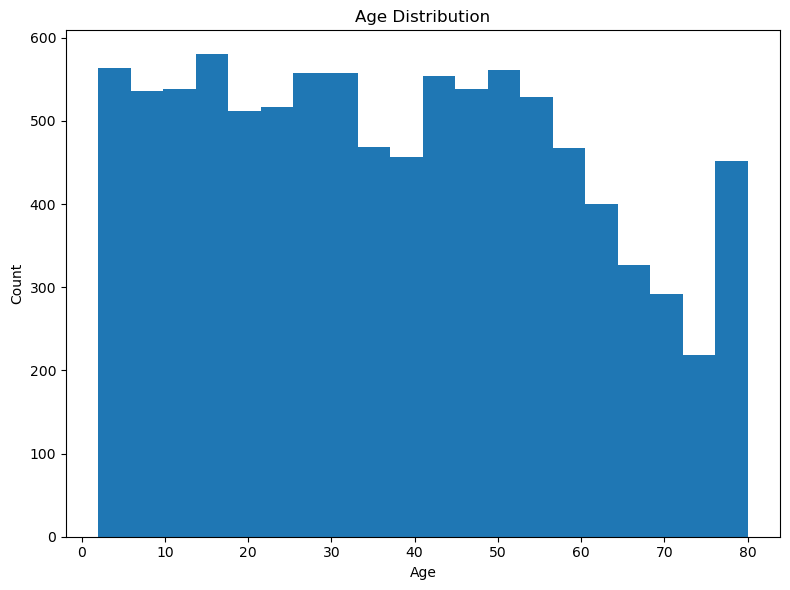

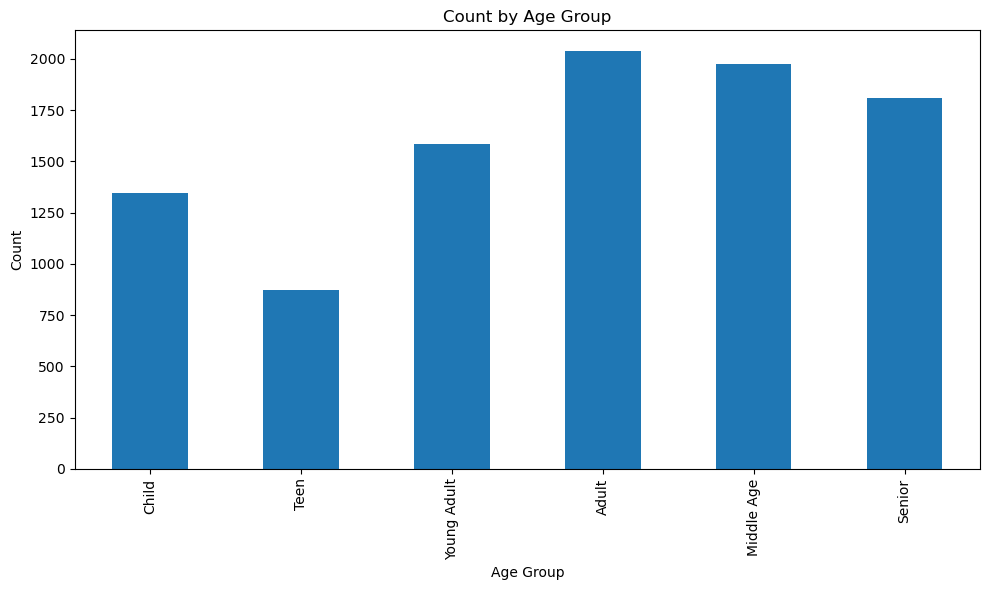

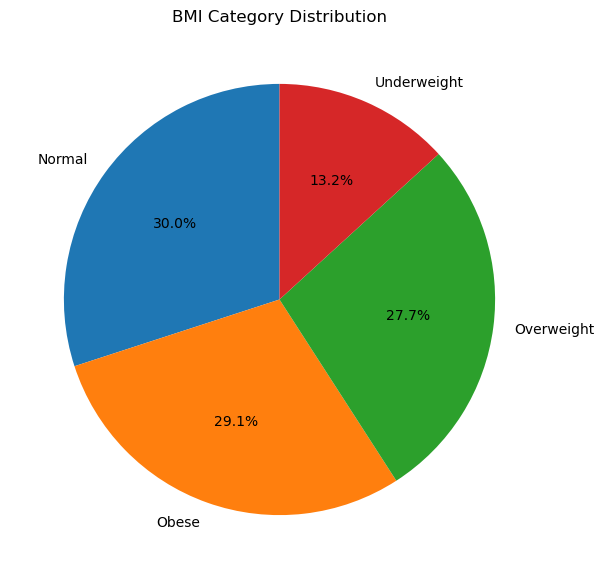

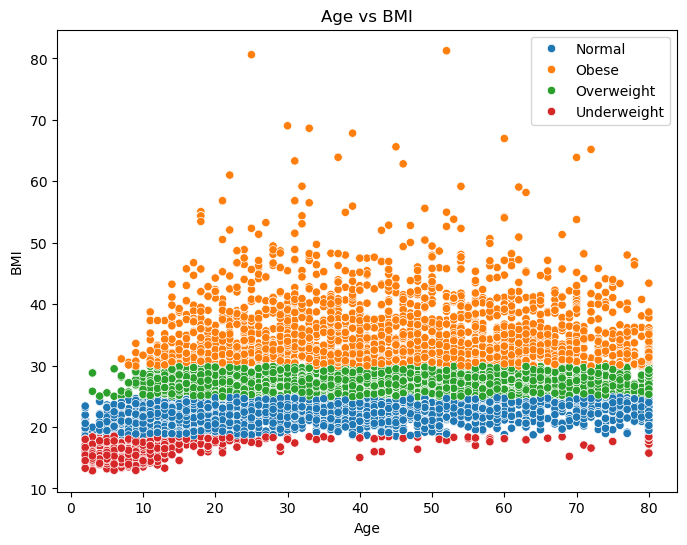

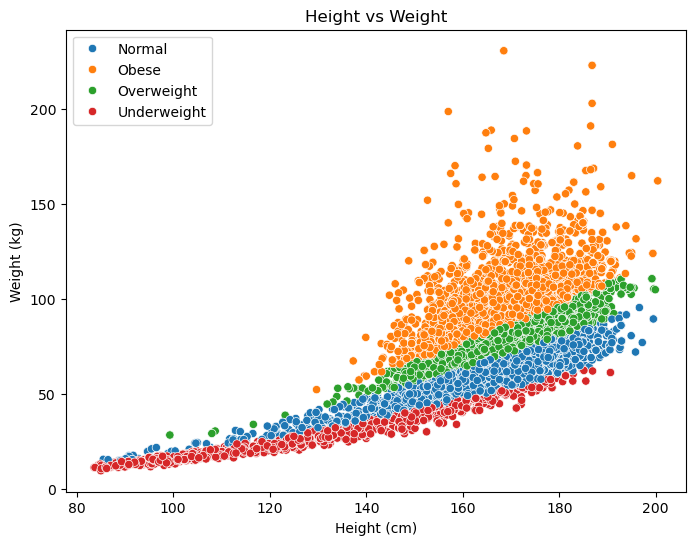

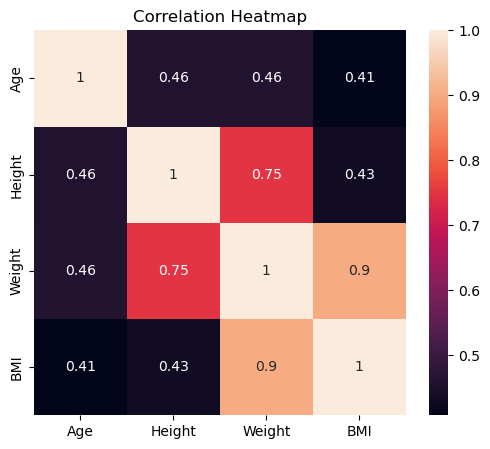

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

with open('NHANES.csv','r') as f:
    raw = [row.replace('\n','').replace('\r','').split(',') for row in f.readlines()]
    header,data,D = raw[0],raw[1:],[]

age_i = header.index("Age")
weight_i = header.index("Weight")
height_i = header.index("Height")
bmi_i = header.index("BMI")

df = pd.DataFrame(data, columns=header)

df = df[["Age", "Weight", "Height", "BMI"]]
df = df.replace(['', 'NA', 'N/A', 'na', 'n/a'], np.nan)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df = df.dropna(subset=['Age','Weight','Height','BMI']).reset_index(drop=True)

df = df[(df['Height'] > 50) & (df['Height'] < 250)]
df = df[(df['Weight'] > 10) & (df['Weight'] < 300)]
df = df[(df['BMI'] > 5) & (df['BMI'] < 80)].reset_index(drop=True)

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,200],
                            labels=['Underweight','Normal','Overweight','Obese'])

age_bins = [0,12,18,30,45,60,200]
age_labels = ['Child','Teen','Young Adult','Adult','Middle Age','Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

summary = df[['Age','Weight','Height','BMI']].describe()
print("SUMMARY STATISTICS")
print(summary)

counts = df['BMI_Category'].value_counts().reindex(['Underweight','Normal','Overweight','Obese'])
print("\nBMI CATEGORY COUNTS")
print(counts)

plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
age_group_counts = df['Age_Group'].value_counts().reindex(age_labels).fillna(0)
age_group_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count by Age Group')
plt.tight_layout()
plt.show()


for row in data:
    try:
        age = float(row[age_i])
        weight = float(row[weight_i])
        height = float(row[height_i])
        bmi = float(row[bmi_i])
        if age > 0 and weight > 0 and height > 0:
            D.append([age, weight, height, bmi])
    except:
        pass

D = np.array(D)

age = D[:,0]
weight = D[:,1]
height = D[:,2]
bmi = weight / ((height / 100) ** 2)

def bmi_category(x):
    if x < 18.5: return "Underweight"
    elif x < 24.9: return "Normal"
    elif x < 29.9: return "Overweight"
    else: return "Obese"

categories = np.array([bmi_category(x) for x in bmi])

unique, counts = np.unique(categories, return_counts=True)
plt.figure(figsize=(7,7))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.title("BMI Category Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=age, y=bmi, hue=categories)
plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=height, y=weight, hue=categories)
plt.title("Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

data_matrix = np.vstack([age, height, weight, bmi]).T
corr = np.corrcoef(data_matrix, rowvar=False)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=["Age","Height","Weight","BMI"], yticklabels=["Age","Height","Weight","BMI"])
plt.title("Correlation Heatmap")
plt.show()
